<a href="https://colab.research.google.com/github/githubCristhianCastro/MiPrimerRepo/blob/main/Copy_of_3_ProcesamientoDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Procesamiento Datos Pandas

Para esta prueba deberá emplear los datos del archivo candidates.csv para lo cual deberá:

1. Almanecar los datos en una base de datos. (Asegurar el almacenamiento con el tipo de dato apropiado)
2. A partir de la lectura de los datos deberá generar un procesamiento reporte.
    
    (Cree el proceso que consideré más conveniente, realizarlo lo más complejo que le sea posible)
    
3. Realizar un código de envio de correos integrado en su solución.


El archivo candidates.csv contiene 50k filas de datos sobre candidatos. Los campos que estamos usando son:
- First Name
- Last Name
- Email
- Country
- Application Date
- Yoe (years of experience)
- Seniority
- Technology
- Code Challenge Score
- Technical Interview


In [1]:
import pandas as pd

df_candidates = pd.read_excel('candidates.xlsx')
df_candidates

,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7
...,...,...,...,...,...,...,...,...,...,...
49995,Bethany,Shields,rocky_mitchell@hotmail.com,2022-01-09,Dominican Republic,27,Trainee,Security,2,1
49996,Era,Swaniawski,dolores.roob@hotmail.com,2020-06-02,Morocco,21,Lead,Game Development,1,2
49997,Martin,Lakin,savanah.stracke@gmail.com,2018-12-15,Uganda,20,Trainee,System Administration,6,1
49998,Aliya,Abernathy,vivienne.fritsch@yahoo.com,2020-05-30,Czech Republic,20,Senior,Database Administration,0,0


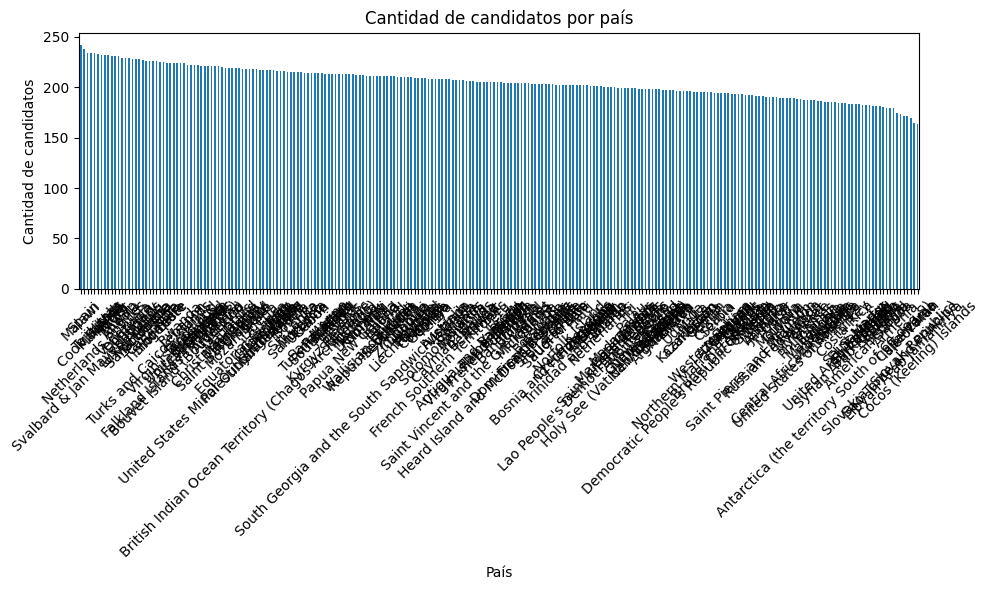

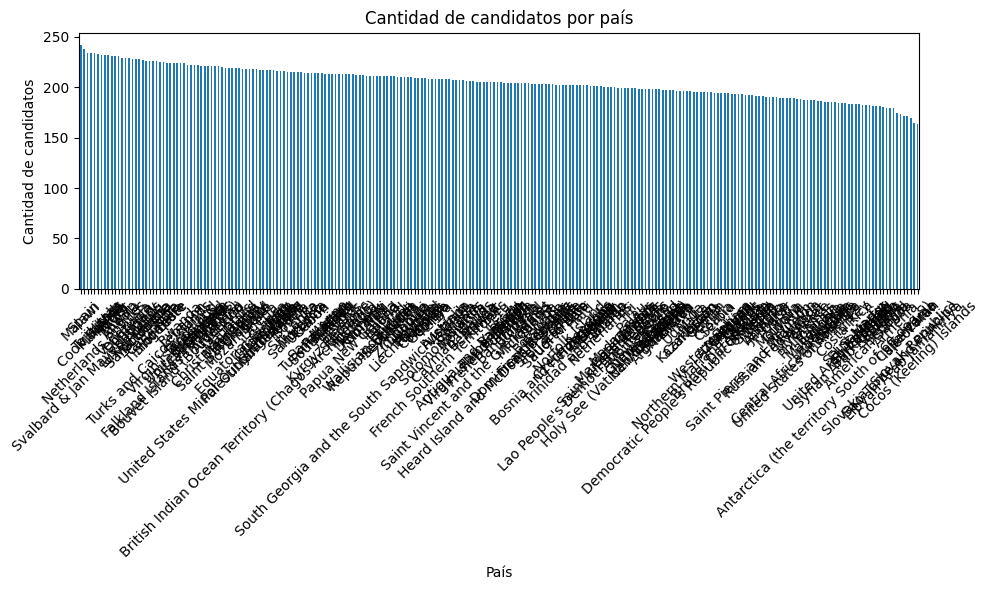

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


df_candidates = pd.read_excel('candidates.xlsx')

candidatos_por_pais = df_candidates['Country'].value_counts()

plt.figure(figsize=(10, 6))
candidatos_por_pais.plot(kind='bar')
plt.title('Cantidad de candidatos por país')
plt.xlabel('País')
plt.ylabel('Cantidad de candidatos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Guardar el informe en un archivo (por ejemplo, PDF o HTML)

plt.figure(figsize=(10, 6))
candidatos_por_pais.plot(kind='bar')
plt.title('Cantidad de candidatos por país')
plt.xlabel('País')
plt.ylabel('Cantidad de candidatos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('informe_candidatos.pdf')



In [5]:
import smtplib
import email.mime.multipart
import email.mime.base
import os
from email.mime.text import MIMEText
#!pip install smtplib

# Crea la conexión SMTP
server = smtplib.SMTP('smtp.gmail.com', 587)

correo = 'kevinmenesesdeveloper@gmail.com'
pas ='tttoeuohvwawgkvt'
# Inicia sesión en tu cuenta de Gmail
server.starttls()

server.login(correo, pas)

# Definir el remitente y destinatario del correo electrónico
remitente = "kevinmenesesdeveloper@gmail.com"
destinatario = "kevinmenesesdeveloper@gmail.com"

In [7]:
# Crear el mensaje del correo electrónico
mensaje = email.mime.multipart.MIMEMultipart()
mensaje['From'] = remitente
mensaje['To'] = destinatario
mensaje['Subject'] = "Correo electrónico con archivo adjunto"

# Añadir el cuerpo del mensaje
cuerpo = "Hola,\n\nEste es un mensaje de prueba enviado desde Python con un archivo adjunto.\n\nSaludos,\n Kevin"
mensaje.attach(email.mime.text.MIMEText(cuerpo, 'plain'))

# Añadir el archivo Excel como adjunto
ruta_archivo = '/content/candidates.xlsx'
archivo = open(ruta_archivo, 'rb')
adjunto = email.mime.base.MIMEBase('application', 'octet-stream')
adjunto.set_payload((archivo).read())
email.encoders.encode_base64(adjunto)
adjunto.add_header('Content-Disposition', "attachment; filename= %s" % ruta_archivo)
mensaje.attach(adjunto)

# Convertir el mensaje a texto plano
texto = mensaje.as_string()

# Enviar el correo electrónico
server.sendmail(remitente, destinatario, texto)

# Cerrar la conexión SMTP
server.quit()

(221,
 b'2.0.0 closing connection c20-20020a056122031400b0047dff8f60e8sm717365vko.22 - gsmtp')